# Milestone 1 - Independent Project
Version: Jun-2019

## Author - Kumaran Singaram



## Instructions

1. Generate a clear problem statement and provide the location for the dataset you use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

# Abstract

In this analysis, I will be using a Pokemon data set. This includes variables such as the type of the pokemon, their attributes, the generation they are from, and whether they are considered a 'Lengendary' Pokemon. The data set can be very useful in understanding the types of Pokemon that tend to be powerful.

The data set consists of 721 Pokemon. The full set of variables are listed below:

- #: ID for each Pokemon
- Name: Name of each Pokemon
- Type 1: Each Pokemon has a type
- Type 2: Some Pokemon have dual types
- Total: Sum of all stats
- HP: Hit Points (Health)
- Attack: Normal Attacks
- Defense: Normal Defense
- SP Atk: Special Attack
- SP Def: Special Defense
- Speed: Determines Pokemon that attacks first

## Problem

The goal of this milestone is to slice the data set in a variety of ways to hopefully better understand the effect of different types of Pokemon (including Generation and whether a Pokemon is Legendary) on their raw statistical attributes.

In [1]:
#import libraries
#read file

import pandas as pd
import numpy as np

pokemon = pd.read_csv("data/pokemon.csv")

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
#change type from numeric to object
pokemon['Generation'] = pokemon['Generation'].astype('object')

In [3]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [4]:
#count number of pokemon in each generation
pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

### Correlation Matrix

It's useful to begin with a correlation analysis to find where it may be useful to dig deeper.

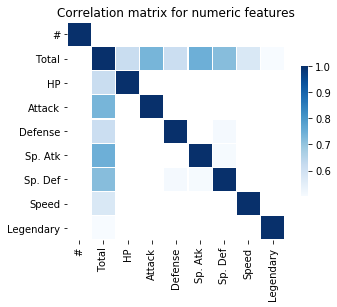

In [5]:
#visualize a correlation matrix of the numeric variables
import seaborn as sns
import matplotlib.pyplot as plt

poke_corr = pokemon.corr()

corr_threshold = 0.5
sns.heatmap(poke_corr[np.abs(poke_corr) >= corr_threshold], vmax = 1.0, cmap = 'Blues', square = True, 
            linewidths = .25, cbar_kws = {'shrink': 0.6});
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'vertical')
plt.show()

Not too useful insights from the matrix. There is light correlation between special defense and defense. Other than that, not much to note.

### Analyzing Pokemon Across Generation

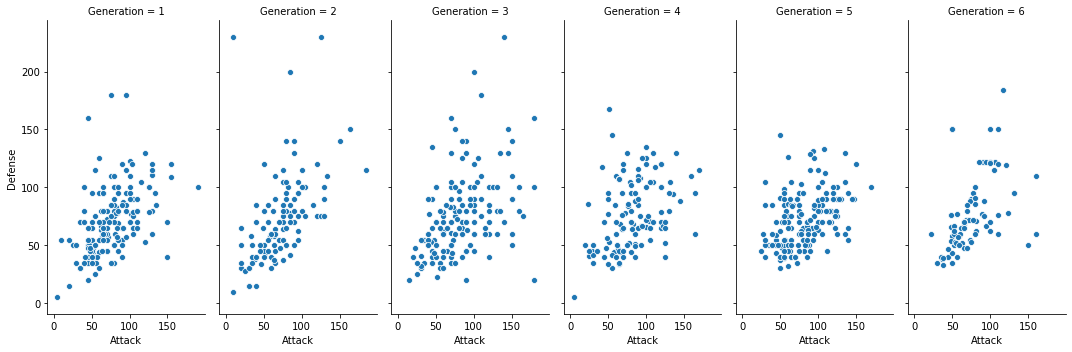

In [6]:
#check variation across generations by attack/defense metrics

t = sns.FacetGrid(pokemon, col = 'Generation', height = 3)
t.fig.set_figwidth(15)
t.fig.set_figheight(5)
t = t.map(sns.scatterplot, 'Attack', 'Defense');

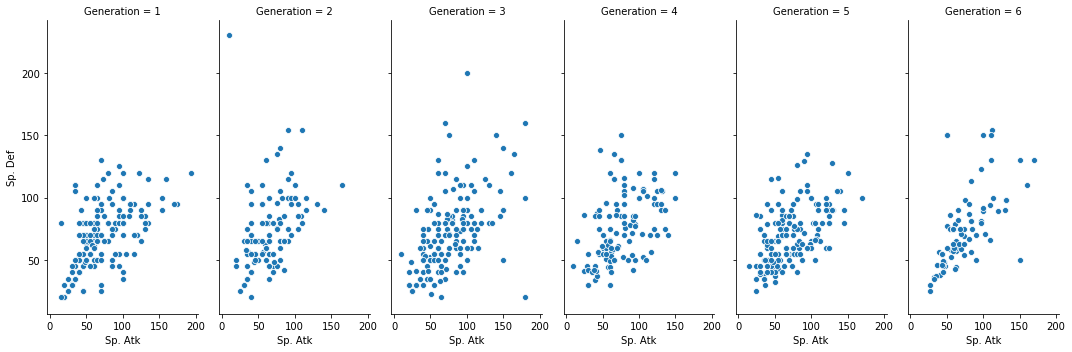

In [7]:
t = sns.FacetGrid(pokemon, col = 'Generation', height = 3)
t.fig.set_figwidth(15)
t.fig.set_figheight(5)
t = t.map(sns.scatterplot, 'Sp. Atk', 'Sp. Def');

Generation 3 looks widely distributed in both of the charts. Generation 5 on the other hand, seems to be very concentrated. Otherwise, the charts look fairly consistent across generation.

### Using a Heat Map to Identify Top Pokemon Types

In [8]:
#break total attribute into bins for heat map

num_bins = 15
pokemon['total-bin'] = pd.cut(pokemon['Total'], bins = num_bins, labels = range(num_bins))
pokemon[['Total', 'total-bin']].head()

,Total,total-bin
0,318,3
1,405,5
2,525,8
3,625,11
4,309,3


In [9]:
total_type = pd.crosstab(pokemon['total-bin'], pokemon['Type 1'], normalize = 'columns')
total_type

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
total-bin,,,,,,,,,,,,,,,,,,
0,0.144928,0.032258,0.00000,0.022727,0.058824,0.037037,0.000000,0.00,0.00000,0.028571,0.00000,0.000000,0.040816,0.000000,0.017544,0.000000,0.000000,0.035714
1,0.072464,0.000000,0.00000,0.000000,0.058824,0.037037,0.019231,0.25,0.00000,0.014286,0.00000,0.041667,0.102041,0.035714,0.017544,0.000000,0.000000,0.008929
2,0.072464,0.096774,0.12500,0.136364,0.058824,0.074074,0.019231,0.00,0.09375,0.100000,0.15625,0.083333,0.112245,0.142857,0.087719,0.090909,0.111111,0.053571
3,0.086957,0.096774,0.03125,0.068182,0.117647,0.111111,0.173077,0.00,0.21875,0.200000,0.18750,0.208333,0.071429,0.250000,0.140351,0.022727,0.074074,0.232143
4,0.043478,0.096774,0.00000,0.068182,0.176471,0.074074,0.057692,0.00,0.06250,0.014286,0.06250,0.000000,0.102041,0.071429,0.035088,0.204545,0.037037,0.035714
5,0.188406,0.096774,0.12500,0.090909,0.058824,0.111111,0.173077,0.00,0.03125,0.128571,0.03125,0.083333,0.112245,0.000000,0.052632,0.136364,0.037037,0.089286
6,0.086957,0.064516,0.03125,0.068182,0.058824,0.148148,0.019231,0.00,0.09375,0.100000,0.09375,0.083333,0.142857,0.107143,0.052632,0.045455,0.111111,0.080357
7,0.202899,0.193548,0.06250,0.159091,0.176471,0.185185,0.134615,0.00,0.31250,0.171429,0.15625,0.166667,0.163265,0.285714,0.192982,0.204545,0.148148,0.214286
8,0.028986,0.161290,0.03125,0.250000,0.058824,0.185185,0.211538,0.25,0.06250,0.157143,0.18750,0.208333,0.061224,0.107143,0.052632,0.113636,0.185185,0.142857


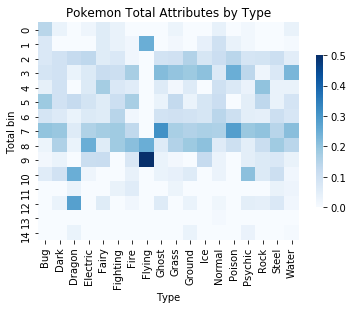

In [10]:
#build heat map on total attribute by pokemon type

ax = sns.heatmap(total_type, cmap = 'Blues', square = True, cbar_kws = {'shrink': 0.7})
ax.set_xlabel('Type')
ax.set_ylabel('Total bin')
ax.set_title('Pokemon Total Attributes by Type');

Heavy concentration in the flying type, but this seems to be due to a light sample size. Few Pokemon have flying as a primary type. Additionally, Dragon, Ground, and Psychic seem to be the only types with a visibly non zero concentration of high totals. Ghost and Poison look to be the most 'average' Pokemon types.

### Understanding Type Advantage

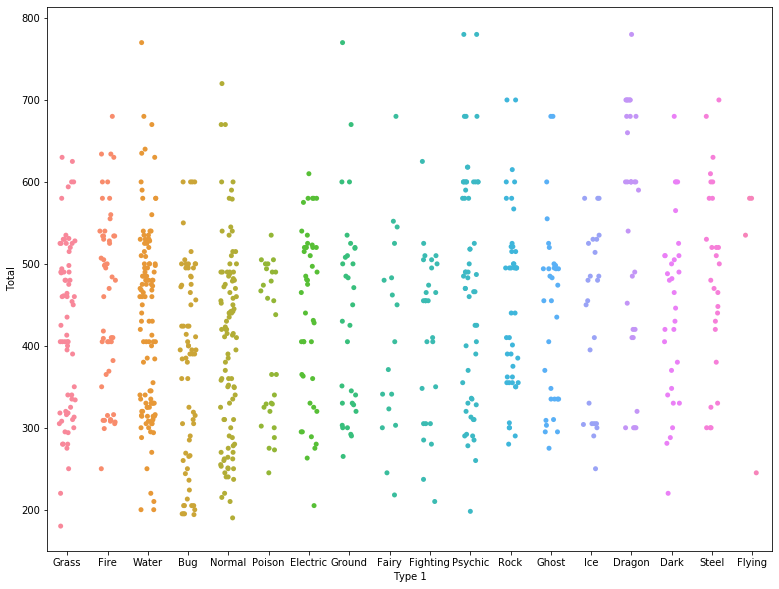

In [11]:
#construct two strip plots to visualize whether pokemon have type advantages

plt.figure(figsize = (13, 10))
sns.stripplot(x = 'Type 1', y = 'Total', data = pokemon, jitter = 0.2);

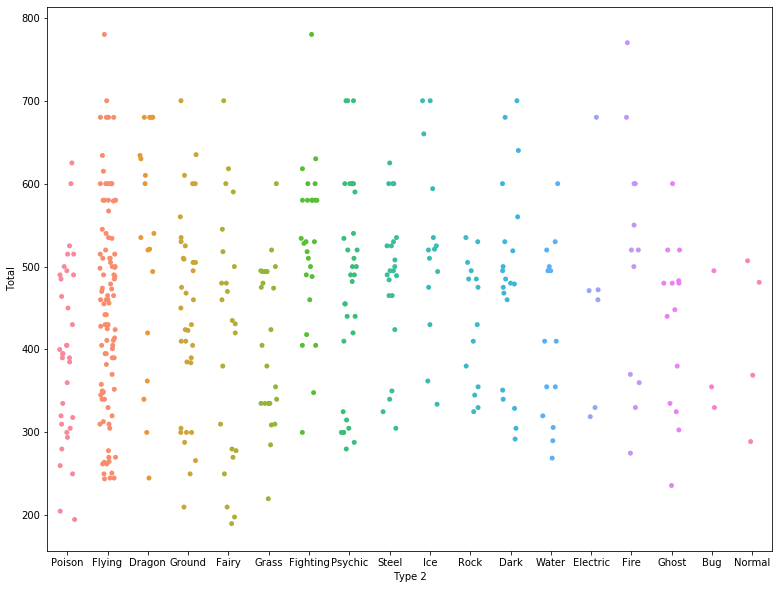

In [12]:
plt.figure(figsize = (13, 10))
sns.stripplot(x = 'Type 2', y = 'Total', data = pokemon, jitter = 0.2);

This confirms that Flying is a common secondary type. These charts also seem to indicate that Psychic and Dragon are elite Pokemon types, with the Psychic type being more common.

### Visualizing Legendary Pokemon Across Generation

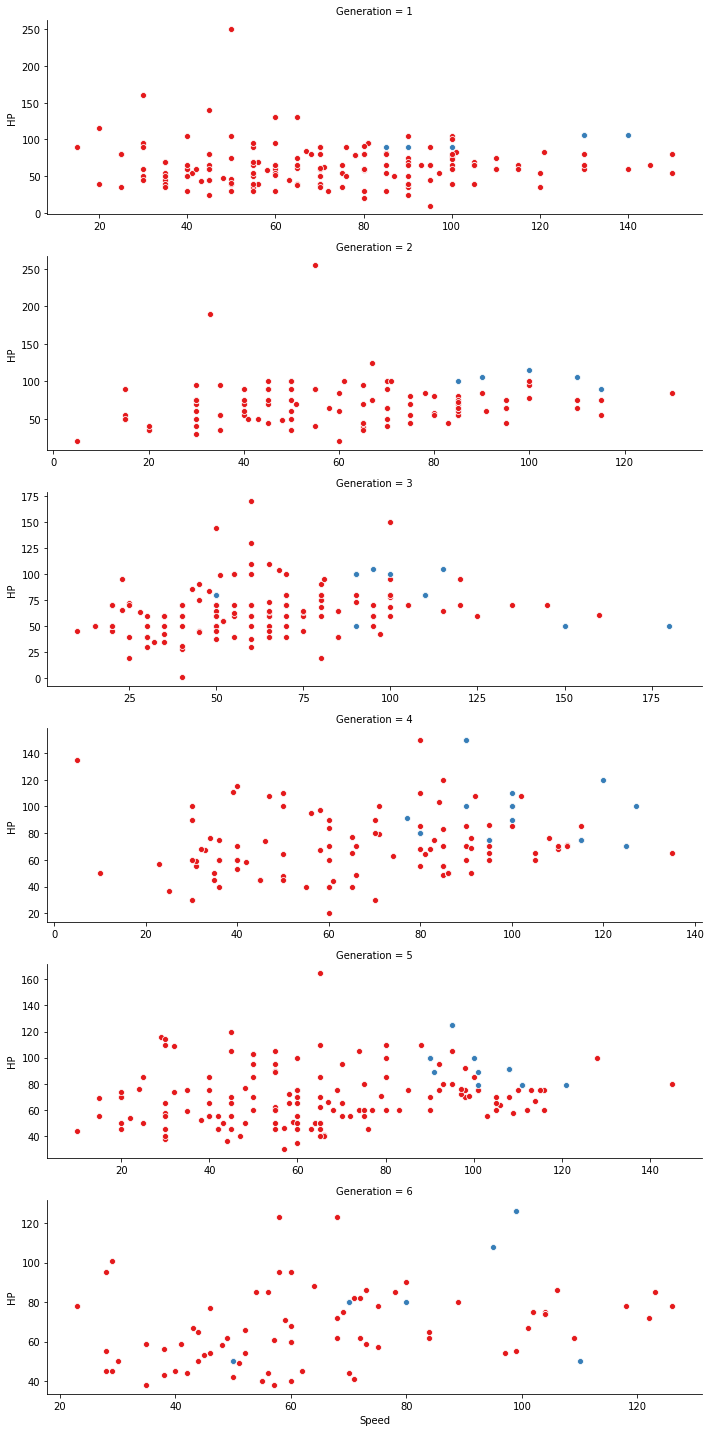

In [41]:
#split apart generations and analyze HP by speed
#highlight legendary pokemon in blue

g = sns.FacetGrid(pokemon, row = 'Generation', hue = 'Legendary', palette = 'Set1',sharex=False, sharey=False)
g.fig.set_figwidth(10)
g.fig.set_figheight(20)
g.map(sns.scatterplot, 'Speed', 'HP');

## Conclusion

From this analysis, we learned a lot of information about the different types of Pokemon and their abilities across different generations. From the chart above, it's quite clear that Legendary Pokemon have greater attributes on average. There also seems to be a higher concentration of Legendary Pokemon in the later generations.

As far as types go, what really stood out was the number of Pokemon with flying as a secondary type. The heat map distribution for Type 1 showed a heavy concentration of flying types in the middle of the pack. However, this was because there is a very small sample of Pokemon with Flying as a primary type. In the second strip plot, it shows that Flying as a secondary attribute is not only very common, it seems to also have many elite Pokemon.

The distribution across generations seems to be fairly stable, indicating that the makers aimed to match Pokemon as much as possible, probably so that when there is cross over, it's still fair. However, it does look like the distributions are a bit more spread out in Generations 2 and 3 vs the others. More investigation needs to be done here.